# 1 - First Look to Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

df_ = pd.concat([train, test]).reset_index()

df_ = df_.drop("index", axis=1)

df = df_.copy()

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.shape

(2919, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [7]:
nulls = df.isnull().sum()
nulls[nulls > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

# 2 - Numerical and Categorical Variables Analysis

In this section, numeric and categorical variables will be determined. The grab_col_names() function will be used for this. First of all, data classes are mentioned below.
* **Numerical**
* **Categorical**
* **Numerical Looking but Categorical Variable**  
For example, let's say we have the values ​​of the Class variable as 1, 2, 3. These values ​​are numeric but represent categories.
* **Categorical Looking but Carry No Information**  
The customerID variable is an example of this. Its type is object, but it does not carry information in terms of category. Contains many classes.  

grab_col_names() function gives the names of Categorical, Numerical and Categorical Looking but Carry No Information variables in the data set.   
  
**cat_cols :** Categorical Columns  
**num_cols :** Numerical Columns  
**cat_but_car :** Columns of Categorical Looking but Carry No Information  
**cat_th :** Class Threshold for Numerical Looking but Categorical Variables  
**car_th :** Class Threshold for Categorical Looking but Carry No Information Variables   
  
**Note :** Numerical Looking but Categorical Variable are also included in categorical variables. 


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
 
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 81
cat_cols: 52
num_cols: 28
cat_but_car: 1
num_but_cat: 10


In [10]:
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'YrSold']

In [11]:
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [12]:
cat_but_car

['Neighborhood']

In this section, numerical and categorical variables will be analyzed using cat_summary() and num_summary() functions.  

The value numbers of the classes in the variable are given by the cat_summary function and the ratio information is given. It is then visualized. 

In [13]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe),
                        "Cumsum":(100 * dataframe[col_name].value_counts() / len(dataframe)).cumsum()}))
    print("####################################################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

         MSZoning      Ratio     Cumsum
RL           2265  77.595067  77.595067
RM            460  15.758822  93.353888
FV            139   4.761905  98.115793
RH             26   0.890716  99.006509
C (all)        25   0.856458  99.862967
####################################################################


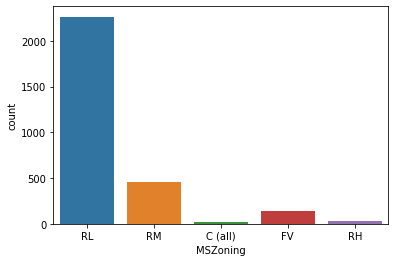

      Street    Ratio    Cumsum
Pave    2907  99.5889   99.5889
Grvl      12   0.4111  100.0000
####################################################################


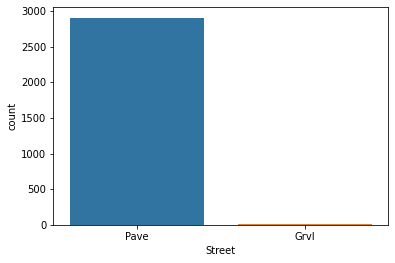

      Alley     Ratio    Cumsum
Grvl    120  4.110997  4.110997
Pave     78  2.672148  6.783145
####################################################################


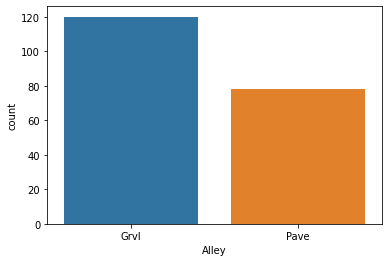

     LotShape      Ratio      Cumsum
Reg      1859  63.686194   63.686194
IR1       968  33.162042   96.848236
IR2        76   2.603631   99.451867
IR3        16   0.548133  100.000000
####################################################################


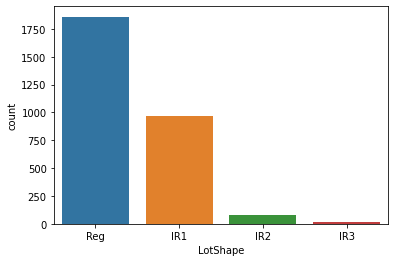

     LandContour      Ratio      Cumsum
Lvl         2622  89.825283   89.825283
HLS          120   4.110997   93.936280
Bnk          117   4.008222   97.944502
Low           60   2.055498  100.000000
####################################################################


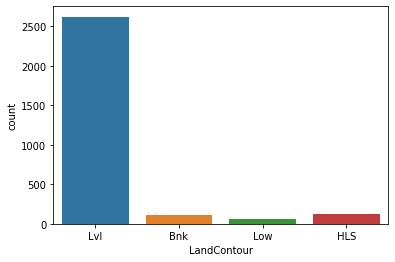

        Utilities      Ratio     Cumsum
AllPub       2916  99.897225  99.897225
NoSeWa          1   0.034258  99.931483
####################################################################


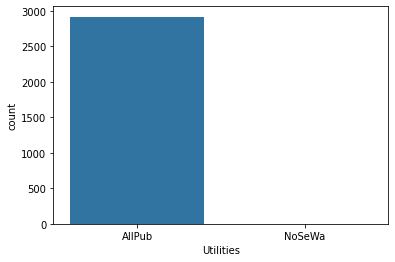

         LotConfig      Ratio      Cumsum
Inside        2133  73.072970   73.072970
Corner         511  17.505995   90.578965
CulDSac        176   6.029462   96.608428
FR2             85   2.911956   99.520384
FR3             14   0.479616  100.000000
####################################################################


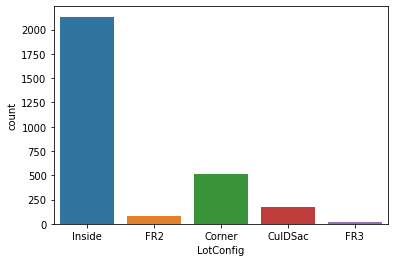

     LandSlope      Ratio      Cumsum
Gtl       2778  95.169579   95.169579
Mod        125   4.282288   99.451867
Sev         16   0.548133  100.000000
####################################################################


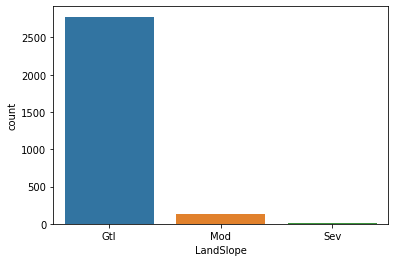

        Condition1      Ratio      Cumsum
Norm          2511  86.022610   86.022610
Feedr          164   5.618362   91.640973
Artery          92   3.151764   94.792737
RRAn            50   1.712915   96.505653
PosN            39   1.336074   97.841727
RRAe            28   0.959233   98.800959
PosA            20   0.685166   99.486125
RRNn             9   0.308325   99.794450
RRNe             6   0.205550  100.000000
####################################################################


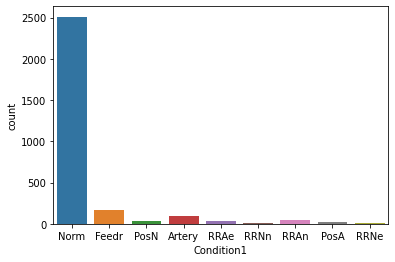

        Condition2      Ratio      Cumsum
Norm          2889  98.972251   98.972251
Feedr           13   0.445358   99.417609
Artery           5   0.171292   99.588900
PosN             4   0.137033   99.725934
PosA             4   0.137033   99.862967
RRNn             2   0.068517   99.931483
RRAn             1   0.034258   99.965742
RRAe             1   0.034258  100.000000
####################################################################


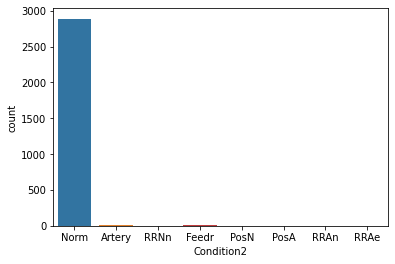

        BldgType      Ratio      Cumsum
1Fam        2425  83.076396   83.076396
TwnhsE       227   7.776636   90.853032
Duplex       109   3.734156   94.587187
Twnhs         96   3.288798   97.875985
2fmCon        62   2.124015  100.000000
####################################################################


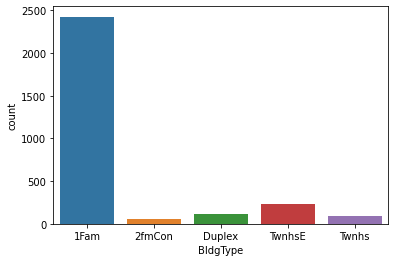

        HouseStyle      Ratio      Cumsum
1Story        1471  50.393971   50.393971
2Story         872  29.873244   80.267215
1.5Fin         314  10.757109   91.024323
SLvl           128   4.385063   95.409387
SFoyer          83   2.843440   98.252826
2.5Unf          24   0.822199   99.075026
1.5Unf          19   0.650908   99.725934
2.5Fin           8   0.274066  100.000000
####################################################################


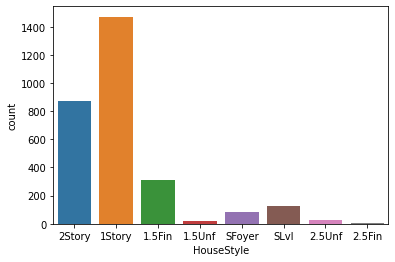

         RoofStyle      Ratio      Cumsum
Gable         2310  79.136691   79.136691
Hip            551  18.876328   98.013018
Gambrel         22   0.753683   98.766701
Flat            20   0.685166   99.451867
Mansard         11   0.376841   99.828708
Shed             5   0.171292  100.000000
####################################################################


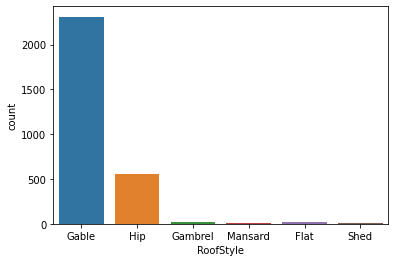

         RoofMatl      Ratio      Cumsum
CompShg      2876  98.526893   98.526893
Tar&Grv        23   0.787941   99.314834
WdShake         9   0.308325   99.623159
WdShngl         7   0.239808   99.862967
Metal           1   0.034258   99.897225
Membran         1   0.034258   99.931483
Roll            1   0.034258   99.965742
ClyTile         1   0.034258  100.000000
####################################################################


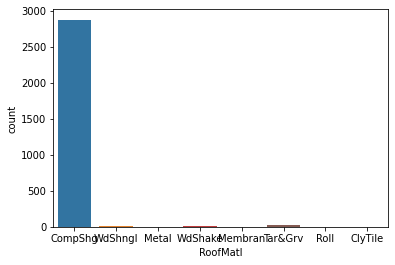

         Exterior1st      Ratio     Cumsum
VinylSd         1025  35.114765  35.114765
MetalSd          450  15.416238  50.531004
HdBoard          442  15.142172  65.673176
Wd Sdng          411  14.080164  79.753340
Plywood          221   7.571086  87.324426
CemntBd          126   4.316547  91.640973
BrkFace           87   2.980473  94.621446
WdShing           56   1.918465  96.539911
AsbShng           44   1.507366  98.047276
Stucco            43   1.473107  99.520384
BrkComm            6   0.205550  99.725934
AsphShn            2   0.068517  99.794450
Stone              2   0.068517  99.862967
CBlock             2   0.068517  99.931483
ImStucc            1   0.034258  99.965742
####################################################################


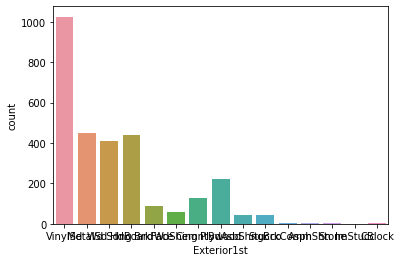

         Exterior2nd      Ratio     Cumsum
VinylSd         1014  34.737924  34.737924
MetalSd          447  15.313464  50.051387
HdBoard          406  13.908873  63.960260
Wd Sdng          391  13.394998  77.355259
Plywood          270   9.249743  86.605002
CmentBd          126   4.316547  90.921548
Wd Shng           81   2.774923  93.696471
BrkFace           47   1.610140  95.306612
Stucco            47   1.610140  96.916752
AsbShng           38   1.301816  98.218568
Brk Cmn           22   0.753683  98.972251
ImStucc           15   0.513875  99.486125
Stone              6   0.205550  99.691675
AsphShn            4   0.137033  99.828708
CBlock             3   0.102775  99.931483
Other              1   0.034258  99.965742
####################################################################


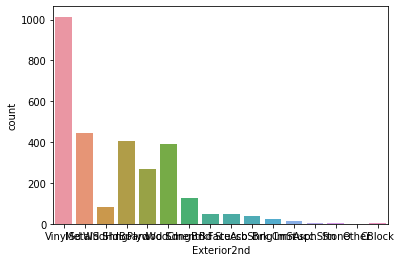

         MasVnrType      Ratio     Cumsum
None           1742  59.677972  59.677972
BrkFace         879  30.113052  89.791024
Stone           249   8.530319  98.321343
BrkCmn           25   0.856458  99.177801
####################################################################


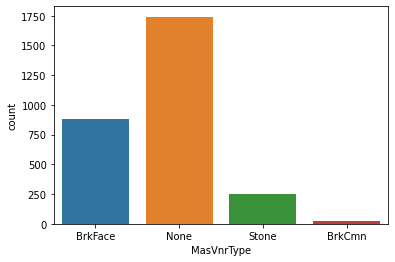

    ExterQual      Ratio      Cumsum
TA       1798  61.596437   61.596437
Gd        979  33.538883   95.135320
Ex        107   3.665639   98.800959
Fa         35   1.199041  100.000000
####################################################################


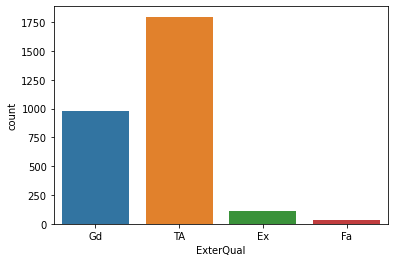

    ExterCond      Ratio      Cumsum
TA       2538  86.947585   86.947585
Gd        299  10.243234   97.190819
Fa         67   2.295307   99.486125
Ex         12   0.411100   99.897225
Po          3   0.102775  100.000000
####################################################################


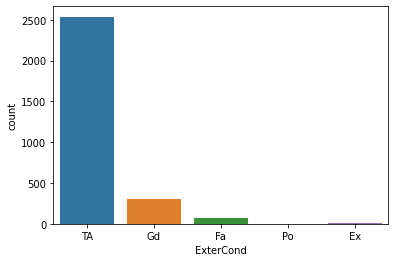

        Foundation      Ratio      Cumsum
PConc         1308  44.809866   44.809866
CBlock        1235  42.309010   87.118876
BrkTil         311  10.654334   97.773210
Slab            49   1.678657   99.451867
Stone           11   0.376841   99.828708
Wood             5   0.171292  100.000000
####################################################################


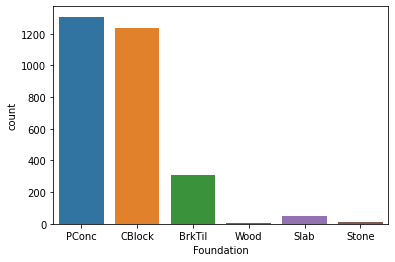

    BsmtQual      Ratio     Cumsum
TA      1283  43.953409  43.953409
Gd      1209  41.418294  85.371703
Ex       258   8.838643  94.210346
Fa        88   3.014731  97.225077
####################################################################


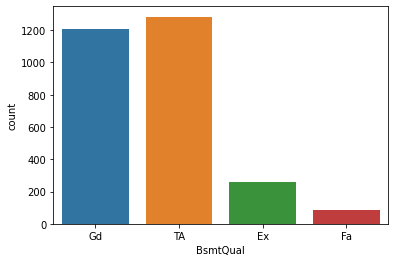

    BsmtCond      Ratio     Cumsum
TA      2606  89.277150  89.277150
Gd       122   4.179514  93.456663
Fa       104   3.562864  97.019527
Po         5   0.171292  97.190819
####################################################################


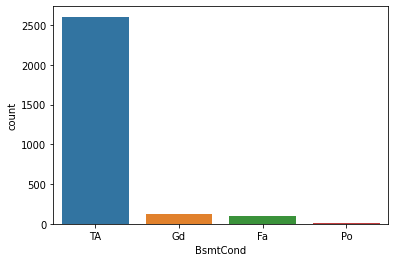

    BsmtExposure      Ratio     Cumsum
No          1904  65.227818  65.227818
Av           418  14.319973  79.547790
Gd           276   9.455293  89.003083
Mn           239   8.187736  97.190819
####################################################################


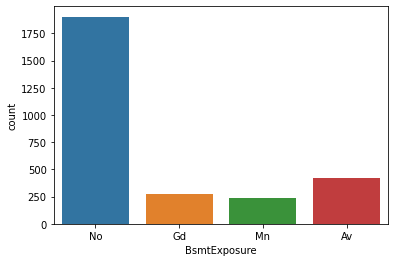

     BsmtFinType1      Ratio     Cumsum
Unf           851  29.153820  29.153820
GLQ           849  29.085303  58.239123
ALQ           429  14.696814  72.935937
Rec           288   9.866393  82.802330
BLQ           269   9.215485  92.017814
LwQ           154   5.275779  97.293594
####################################################################


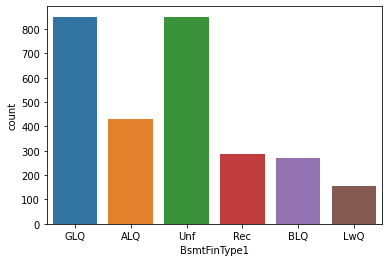

     BsmtFinType2      Ratio     Cumsum
Unf          2493  85.405961  85.405961
Rec           105   3.597122  89.003083
LwQ            87   2.980473  91.983556
BLQ            68   2.329565  94.313121
ALQ            52   1.781432  96.094553
GLQ            34   1.164782  97.259335
####################################################################


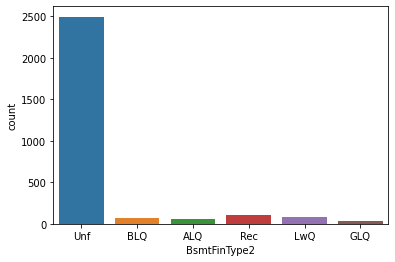

       Heating      Ratio      Cumsum
GasA      2874  98.458376   98.458376
GasW        27   0.924974   99.383350
Grav         9   0.308325   99.691675
Wall         6   0.205550   99.897225
OthW         2   0.068517   99.965742
Floor        1   0.034258  100.000000
####################################################################


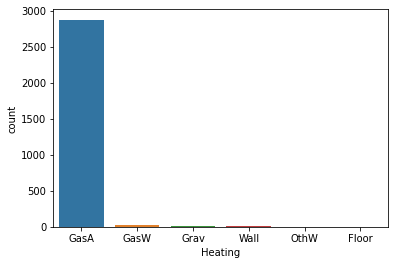

    HeatingQC      Ratio      Cumsum
Ex       1493  51.147653   51.147653
TA        857  29.359370   80.507023
Gd        474  16.238438   96.745461
Fa         92   3.151764   99.897225
Po          3   0.102775  100.000000
####################################################################


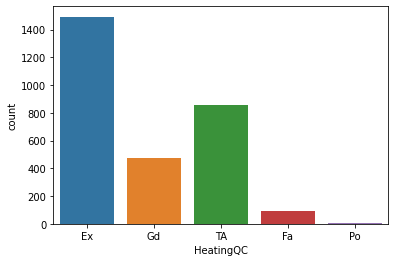

   CentralAir      Ratio      Cumsum
Y        2723  93.285372   93.285372
N         196   6.714628  100.000000
####################################################################


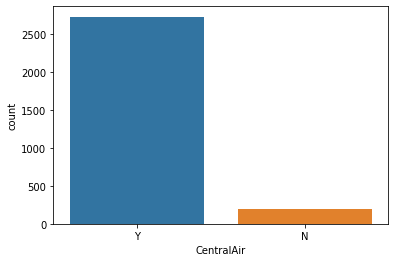

       Electrical      Ratio     Cumsum
SBrkr        2671  91.503940  91.503940
FuseA         188   6.440562  97.944502
FuseF          50   1.712915  99.657417
FuseP           8   0.274066  99.931483
Mix             1   0.034258  99.965742
####################################################################


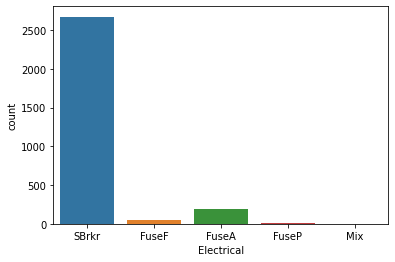

    KitchenQual      Ratio     Cumsum
TA         1492  51.113395  51.113395
Gd         1151  39.431312  90.544707
Ex          205   7.022953  97.567660
Fa           70   2.398082  99.965742
####################################################################


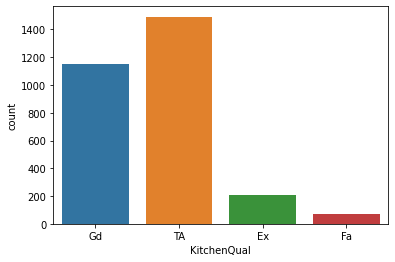

      Functional      Ratio     Cumsum
Typ         2717  93.079822  93.079822
Min2          70   2.398082  95.477903
Min1          65   2.226790  97.704693
Mod           35   1.199041  98.903734
Maj1          19   0.650908  99.554642
Maj2           9   0.308325  99.862967
Sev            2   0.068517  99.931483
####################################################################


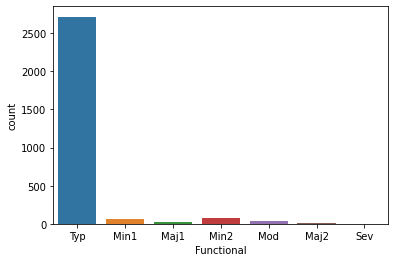

    FireplaceQu      Ratio     Cumsum
Gd          744  25.488181  25.488181
TA          592  20.280918  45.769099
Fa           74   2.535115  48.304214
Po           46   1.575882  49.880096
Ex           43   1.473107  51.353203
####################################################################


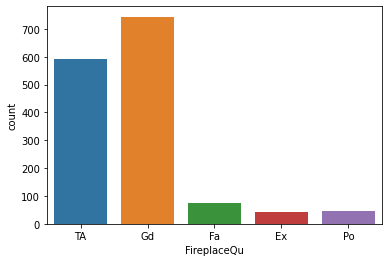

         GarageType      Ratio     Cumsum
Attchd         1723  59.027064  59.027064
Detchd          779  26.687222  85.714286
BuiltIn         186   6.372045  92.086331
Basment          36   1.233299  93.319630
2Types           23   0.787941  94.107571
CarPort          15   0.513875  94.621446
####################################################################


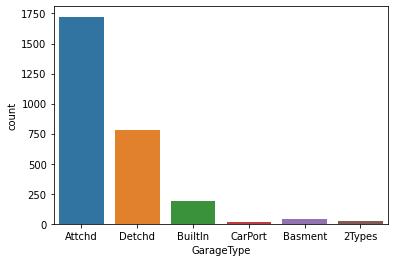

     GarageFinish      Ratio     Cumsum
Unf          1230  42.137718  42.137718
RFn           811  27.783487  69.921206
Fin           719  24.631723  94.552929
####################################################################


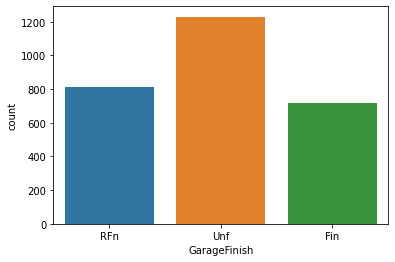

    GarageQual      Ratio     Cumsum
TA        2604  89.208633  89.208633
Fa         124   4.248030  93.456663
Gd          24   0.822199  94.278863
Po           5   0.171292  94.450154
Ex           3   0.102775  94.552929
####################################################################


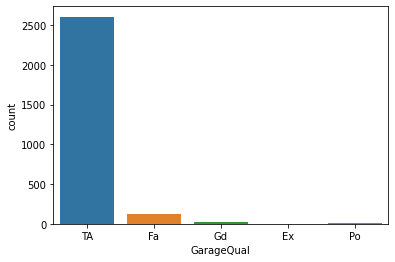

    GarageCond      Ratio     Cumsum
TA        2654  90.921548  90.921548
Fa          74   2.535115  93.456663
Gd          15   0.513875  93.970538
Po          14   0.479616  94.450154
Ex           3   0.102775  94.552929
####################################################################


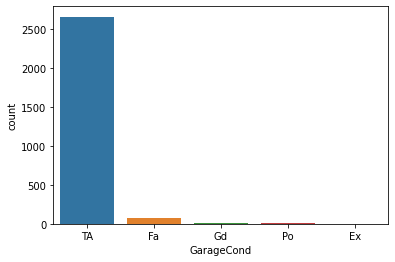

   PavedDrive      Ratio      Cumsum
Y        2641  90.476190   90.476190
N         216   7.399794   97.875985
P          62   2.124015  100.000000
####################################################################


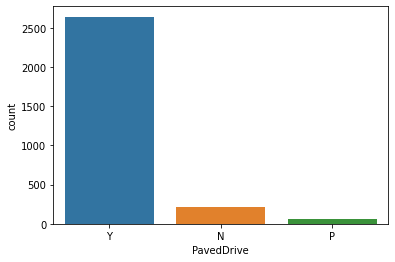

    PoolQC     Ratio    Cumsum
Ex       4  0.137033  0.137033
Gd       4  0.137033  0.274066
Fa       2  0.068517  0.342583
####################################################################


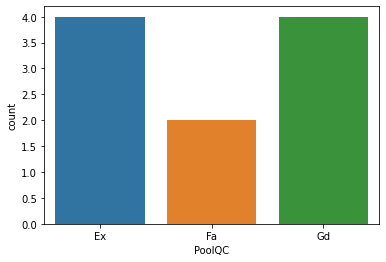

       Fence      Ratio     Cumsum
MnPrv    329  11.270983  11.270983
GdPrv    118   4.042480  15.313464
GdWo     112   3.836930  19.150394
MnWw      12   0.411100  19.561494
####################################################################


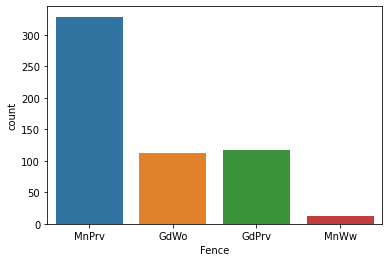

      MiscFeature     Ratio    Cumsum
Shed           95  3.254539  3.254539
Gar2            5  0.171292  3.425831
Othr            4  0.137033  3.562864
TenC            1  0.034258  3.597122
####################################################################


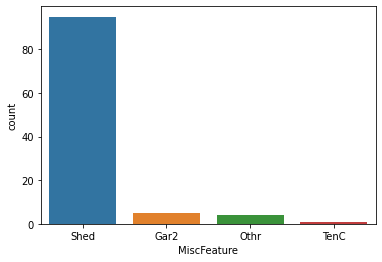

       SaleType      Ratio     Cumsum
WD         2525  86.502227  86.502227
New         239   8.187736  94.689962
COD          87   2.980473  97.670435
ConLD        26   0.890716  98.561151
CWD          12   0.411100  98.972251
ConLI         9   0.308325  99.280576
ConLw         8   0.274066  99.554642
Oth           7   0.239808  99.794450
Con           5   0.171292  99.965742
####################################################################


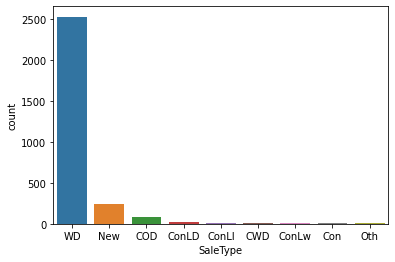

         SaleCondition      Ratio      Cumsum
Normal            2402  82.288455   82.288455
Partial            245   8.393285   90.681740
Abnorml            190   6.509078   97.190819
Family              46   1.575882   98.766701
Alloca              24   0.822199   99.588900
AdjLand             12   0.411100  100.000000
####################################################################


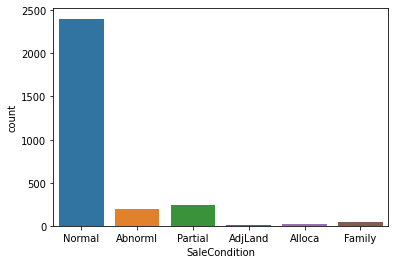

   OverallCond      Ratio      Cumsum
5         1645  56.354916   56.354916
6          531  18.191161   74.546077
7          390  13.360740   87.906817
8          144   4.933196   92.840014
4          101   3.460089   96.300103
3           50   1.712915   98.013018
9           41   1.404591   99.417609
2           10   0.342583   99.760192
1            7   0.239808  100.000000
####################################################################


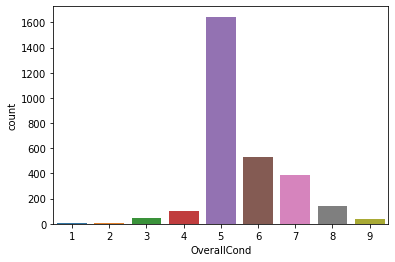

     BsmtFullBath      Ratio     Cumsum
0.0          1705  58.410415  58.410415
1.0          1172  40.150737  98.561151
2.0            38   1.301816  99.862967
3.0             2   0.068517  99.931483
####################################################################


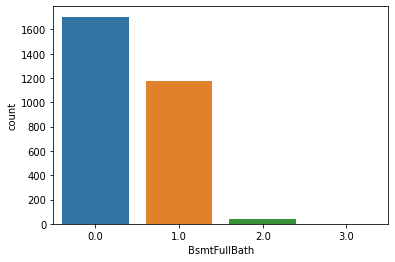

     BsmtHalfBath      Ratio     Cumsum
0.0          2742  93.936280  93.936280
1.0           171   5.858171  99.794450
2.0             4   0.137033  99.931483
####################################################################


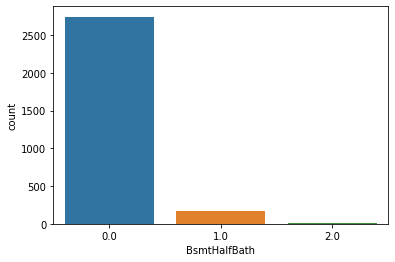

   FullBath      Ratio      Cumsum
2      1530  52.415211   52.415211
1      1309  44.844125   97.259335
3        64   2.192532   99.451867
0        12   0.411100   99.862967
4         4   0.137033  100.000000
####################################################################


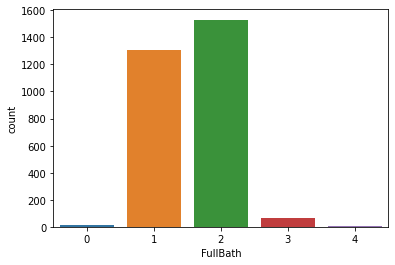

   HalfBath      Ratio      Cumsum
0      1834  62.829736   62.829736
1      1060  36.313806   99.143542
2        25   0.856458  100.000000
####################################################################


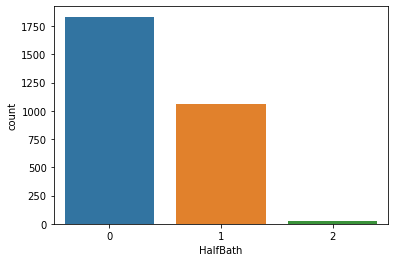

   BedroomAbvGr      Ratio      Cumsum
3          1596  54.676259   54.676259
2           742  25.419664   80.095923
4           400  13.703323   93.799246
1           103   3.528606   97.327852
5            48   1.644399   98.972251
6            21   0.719424   99.691675
0             8   0.274066   99.965742
8             1   0.034258  100.000000
####################################################################


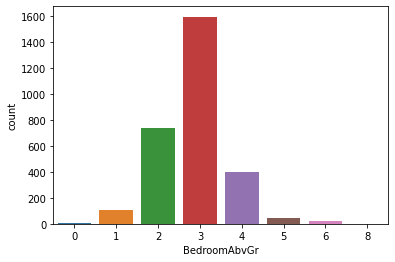

   KitchenAbvGr      Ratio      Cumsum
1          2785  95.409387   95.409387
2           129   4.419322   99.828708
0             3   0.102775   99.931483
3             2   0.068517  100.000000
####################################################################


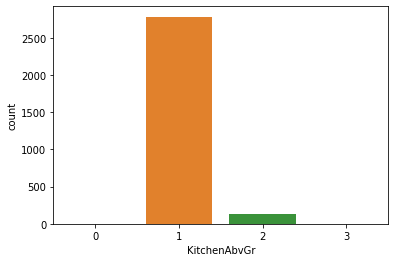

   Fireplaces      Ratio      Cumsum
0        1420  48.646797   48.646797
1        1268  43.439534   92.086331
2         219   7.502569   99.588900
3          11   0.376841   99.965742
4           1   0.034258  100.000000
####################################################################


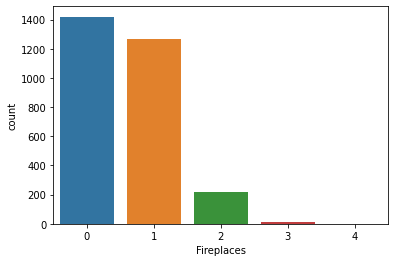

     GarageCars      Ratio     Cumsum
2.0        1594  54.607742  54.607742
1.0         776  26.584447  81.192189
3.0         374  12.812607  94.004796
0.0         157   5.378554  99.383350
4.0          16   0.548133  99.931483
5.0           1   0.034258  99.965742
####################################################################


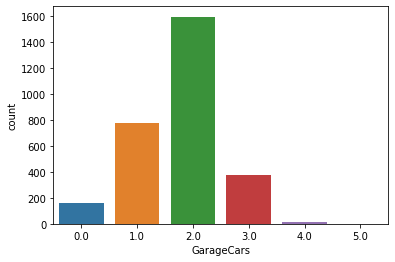

      YrSold      Ratio      Cumsum
2007     692  23.706749   23.706749
2009     647  22.165125   45.871874
2008     622  21.308667   67.180541
2006     619  21.205892   88.386434
2010     339  11.613566  100.000000
####################################################################


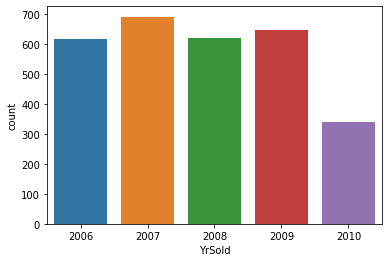

In [14]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

With the num_summary function, descriptive statistics of the numerical columns are given and then visualized using the histogram.

In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=40)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    2919.000000
mean     1460.000000
std       842.787043
min         1.000000
5%        146.900000
10%       292.800000
20%       584.600000
30%       876.400000
40%      1168.200000
50%      1460.000000
60%      1751.800000
70%      2043.600000
80%      2335.400000
90%      2627.200000
95%      2773.100000
99%      2889.820000
max      2919.000000
Name: Id, dtype: float64


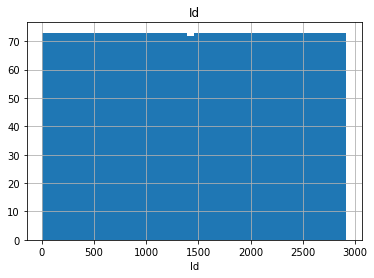

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


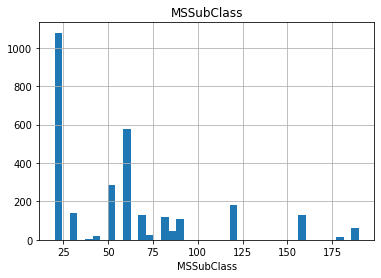

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
5%         32.000000
10%        43.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        68.000000
60%        73.000000
70%        78.000000
80%        84.000000
90%        95.000000
95%       107.000000
99%       135.680000
max       313.000000
Name: LotFrontage, dtype: float64


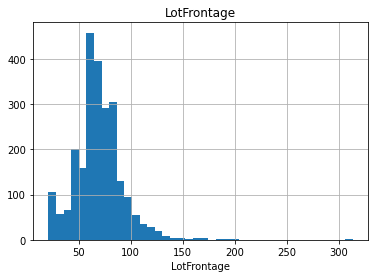

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
5%         3182.000000
10%        4922.400000
20%        7007.600000
30%        7960.400000
40%        8741.000000
50%        9453.000000
60%       10151.600000
70%       11001.200000
80%       12203.800000
90%       14300.600000
95%       17142.900000
99%       33038.640000
max      215245.000000
Name: LotArea, dtype: float64


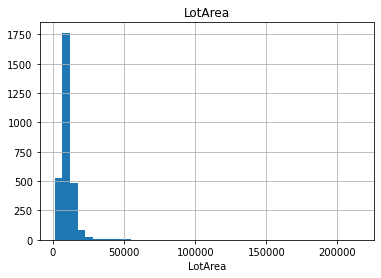

count    2919.000000
mean        6.089072
std         1.409947
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


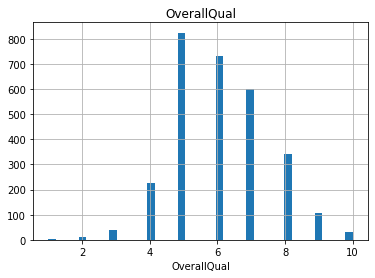

count    2919.000000
mean     1971.312778
std        30.291442
min      1872.000000
5%       1915.000000
10%      1924.000000
20%      1947.000000
30%      1957.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2008.000000
max      2010.000000
Name: YearBuilt, dtype: float64


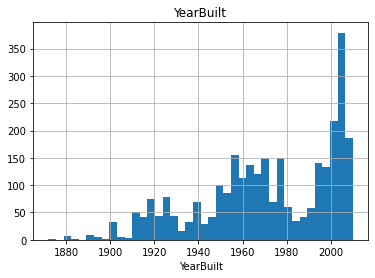

count    2919.000000
mean     1984.264474
std        20.894344
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1960.000000
30%      1970.000000
40%      1978.000000
50%      1993.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.200000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


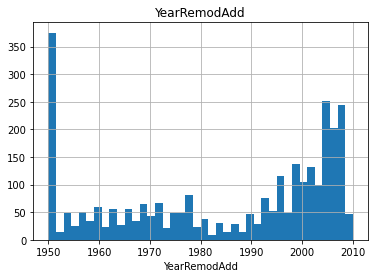

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%       120.000000
80%       202.000000
90%       325.500000
95%       466.500000
99%       771.050000
max      1600.000000
Name: MasVnrArea, dtype: float64


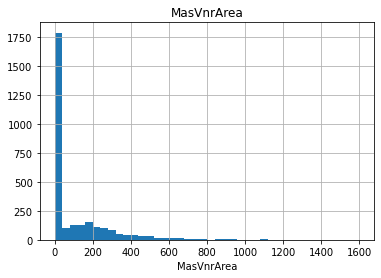

count    2918.000000
mean      441.423235
std       455.610826
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       202.600000
50%       368.500000
60%       515.200000
70%       656.000000
80%       812.000000
90%      1056.900000
95%      1274.000000
99%      1635.320000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


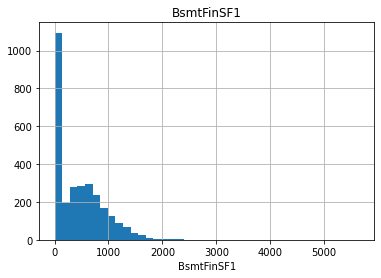

count    2918.000000
mean       49.582248
std       169.205611
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       125.600000
95%       435.000000
99%       874.660000
max      1526.000000
Name: BsmtFinSF2, dtype: float64


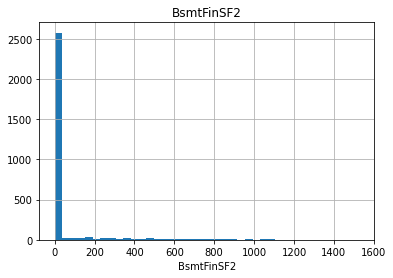

count    2918.000000
mean      560.772104
std       439.543659
min         0.000000
5%          0.000000
10%        56.000000
20%       174.000000
30%       270.000000
40%       365.800000
50%       467.000000
60%       595.000000
70%       732.000000
80%       892.600000
90%      1212.600000
95%      1474.900000
99%      1776.490000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


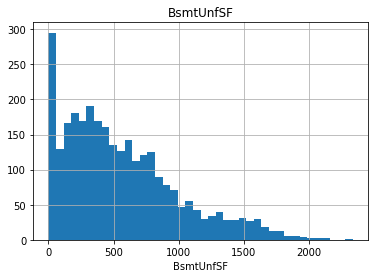

count    2918.000000
mean     1051.777587
std       440.766258
min         0.000000
5%        455.250000
10%       600.000000
20%       741.000000
30%       836.000000
40%       911.000000
50%       989.500000
60%      1089.200000
70%      1216.000000
80%      1392.000000
90%      1614.000000
95%      1776.150000
99%      2198.300000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


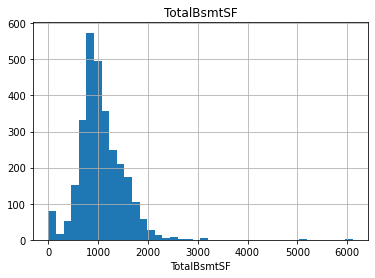

count    2919.000000
mean     1159.581706
std       392.362079
min       334.000000
5%        665.900000
10%       744.800000
20%       847.000000
30%       914.000000
40%       996.200000
50%      1082.000000
60%      1180.000000
70%      1314.000000
80%      1483.400000
90%      1675.000000
95%      1830.100000
99%      2288.020000
max      5095.000000
Name: 1stFlrSF, dtype: float64


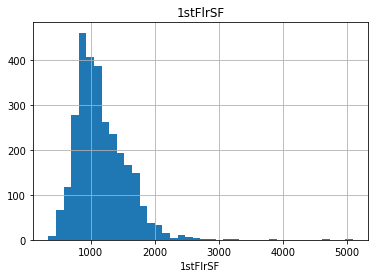

count    2919.000000
mean      336.483727
std       428.701456
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       427.400000
70%       636.000000
80%       770.800000
90%       925.000000
95%      1131.200000
99%      1400.200000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


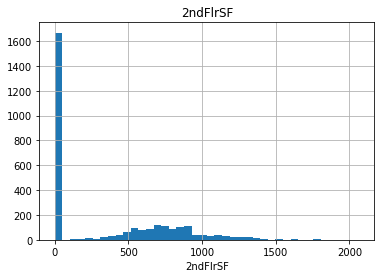

count    2919.000000
mean        4.694416
std        46.396825
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       153.840000
max      1064.000000
Name: LowQualFinSF, dtype: float64


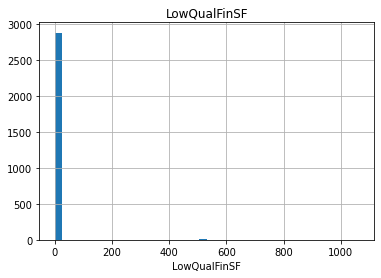

count    2919.000000
mean     1500.759849
std       506.051045
min       334.000000
5%        861.000000
10%       923.800000
20%      1064.600000
30%      1200.000000
40%      1329.200000
50%      1444.000000
60%      1560.000000
70%      1680.000000
80%      1838.400000
90%      2153.200000
95%      2464.200000
99%      2935.720000
max      5642.000000
Name: GrLivArea, dtype: float64


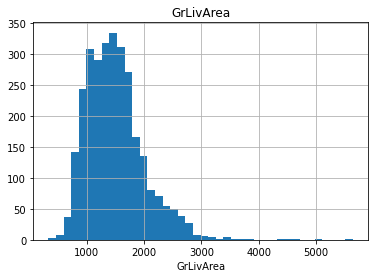

count    2919.000000
mean        6.451524
std         1.569379
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         8.000000
95%         9.000000
99%        11.000000
max        15.000000
Name: TotRmsAbvGrd, dtype: float64


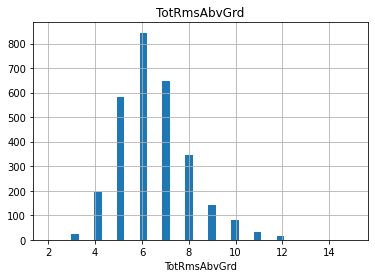

count    2760.000000
mean     1978.113406
std        25.574285
min      1895.000000
5%       1928.000000
10%      1941.000000
20%      1957.000000
30%      1964.000000
40%      1972.000000
50%      1979.000000
60%      1993.000000
70%      1999.000000
80%      2004.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64


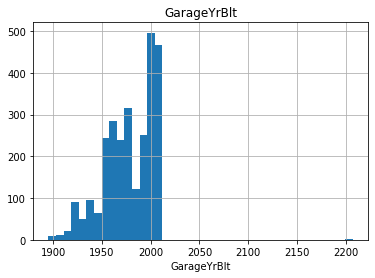

count    2918.000000
mean      472.874572
std       215.394815
min         0.000000
5%          0.000000
10%       240.000000
20%       296.000000
30%       379.000000
40%       440.000000
50%       480.000000
60%       513.000000
70%       560.900000
80%       621.000000
90%       758.000000
95%       856.150000
99%      1019.490000
max      1488.000000
Name: GarageArea, dtype: float64


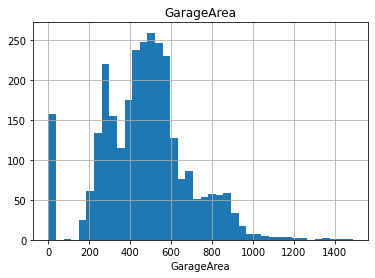

count    2919.000000
mean       93.709832
std       126.526589
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       257.000000
95%       328.000000
99%       500.820000
max      1424.000000
Name: WoodDeckSF, dtype: float64


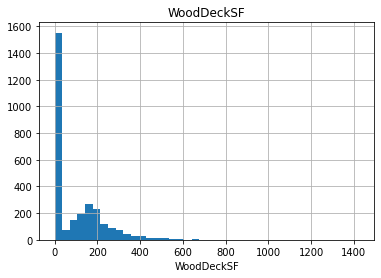

count    2919.000000
mean       47.486811
std        67.575493
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        26.000000
60%        40.000000
70%        58.000000
80%        85.000000
90%       131.200000
95%       183.100000
99%       284.460000
max       742.000000
Name: OpenPorchSF, dtype: float64


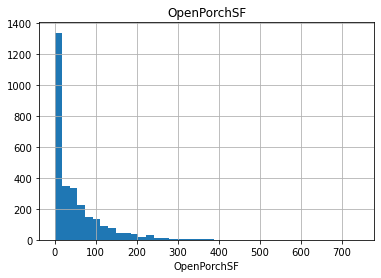

count    2919.000000
mean       23.098321
std        64.244246
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       176.000000
99%       264.000000
max      1012.000000
Name: EnclosedPorch, dtype: float64


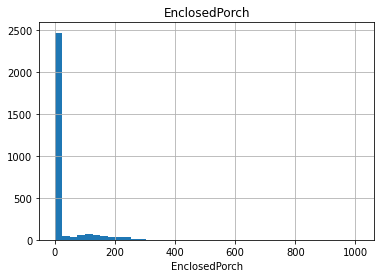

count    2919.000000
mean        2.602261
std        25.188169
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       144.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


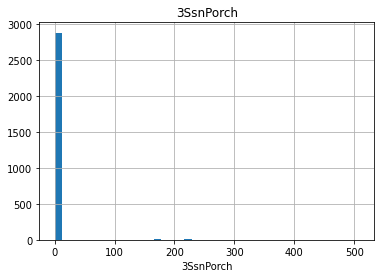

count    2919.000000
mean       16.062350
std        56.184365
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       161.000000
99%       259.820000
max       576.000000
Name: ScreenPorch, dtype: float64


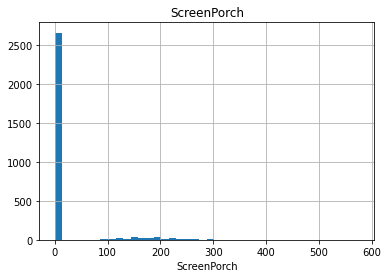

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       800.000000
Name: PoolArea, dtype: float64


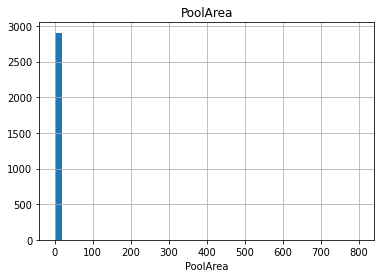

count     2919.000000
mean        50.825968
std        567.402211
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        982.000000
max      17000.000000
Name: MiscVal, dtype: float64


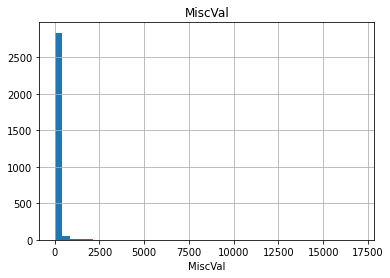

count    2919.000000
mean        6.213087
std         2.714762
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


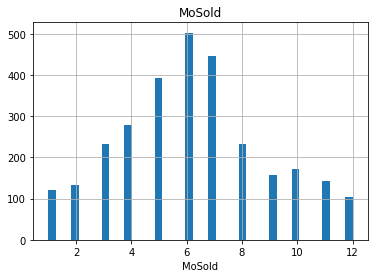

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


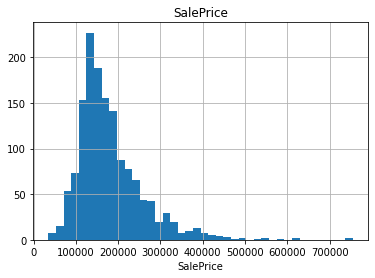

In [16]:
for col in num_cols:
    num_summary(df, col, plot=True)

# 3 - Target Variable Analysis

In this section, target variable analysis will be done. The average of the target variable will be given according to the classes of the categorical variables. Here our target variable is "SalePrice".

In [17]:
def target_summary_cat(df, target, cat_col):
    print("target : ", target)
    print(cat_col)
    print(pd.DataFrame({"Target_Mean": df.groupby(cat_col)[target].mean(),
                        "Target_Count": df.groupby(cat_col)[target].count()}), end="\n\n\n")

In [18]:
for col in cat_cols:
    target_summary_cat(df, "SalePrice", col)

target :  SalePrice
MSZoning
            Target_Mean  Target_Count
MSZoning                             
C (all)    74528.000000            10
FV        214014.061538            65
RH        131558.375000            16
RL        191004.994787          1151
RM        126316.830275           218


target :  SalePrice
Street
          Target_Mean  Target_Count
Street                             
Grvl    130190.500000             6
Pave    181130.538514          1454


target :  SalePrice
Alley
         Target_Mean  Target_Count
Alley                             
Grvl   122219.080000            50
Pave   168000.585366            41


target :  SalePrice
LotShape
            Target_Mean  Target_Count
LotShape                             
IR1       206101.665289           484
IR2       239833.365854            41
IR3       216036.500000            10
Reg       164754.818378           925


target :  SalePrice
LandContour
               Target_Mean  Target_Count
LandContour                   

# 3.1 - Log Transformation

In this part, the target variable is simulated to a linear distribution with log transformation and then examined.

<AxesSubplot:>

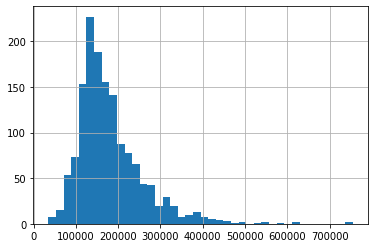

In [19]:
df["SalePrice"].hist(bins=40)

In [20]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

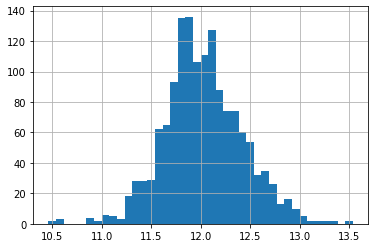

In [21]:
np.log1p(df['SalePrice']).hist(bins=40)

In [22]:
np.log1p(df['SalePrice']).describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

# 4 - Correlation Analysis

Correlation analysis was performed. Correlation Heatmap and Triangle Correlation Heatmap were given.

In [23]:
corr = df[num_cols].corr()

corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.016581,-0.050438,-0.025219,-0.016947,0.018251,-0.014453,-0.024924,-0.008678,-0.022252,-0.037816,-0.029046,-0.029368,-0.026666,-0.008865,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,0.034409,0.043315,0.005433,-0.064311,-0.072530,-0.125994,-0.219965,-0.248641,0.309309,0.026482,0.071677,0.040509,0.087898,-0.103394,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,0.122811,0.091557,0.221079,0.219408,0.047431,0.113714,0.354822,0.458247,0.026545,0.004894,0.382462,0.349513,0.076673,0.359786,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,0.024128,0.021612,0.125596,0.194031,0.084059,0.021362,0.254138,0.332460,0.031515,0.000554,0.284519,0.213802,-0.008628,0.213251,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,0.597554,0.571532,0.432947,0.281810,-0.042771,0.275175,0.549294,0.479152,0.245596,-0.048393,0.575126,0.389761,0.571803,0.565122,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,0.790982
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,1.000000,0.612235,0.314051,0.279581,-0.027595,0.130473,0.408515,0.310814,0.017588,-0.144191,0.242666,0.114280,0.834812,0.480735,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.612235,1.000000,0.196875,0.152126,-0.062153,0.165175,0.298107,0.242245,0.158985,-0.060371,0.316972,0.198250,0.652365,0.376765,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,0.314051,0.196875,1.000000,0.303490,-0.015645,0.090163,0.397240,0.395834,0.121014,-0.057912,0.402994,0.278228,0.255112,0.374061,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,0.279581,0.152126,0.303490,1.000000,-0.055045,-0.477404,0.536467,0.458092,-0.162301,-0.066028,0.211669,0.052141,0.194270,0.310449,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.386420
BsmtFinSF2,0.018251,-0.072530,0.047431,0.084059,-0.042771,-0.027595,-0.062153,-0.015645,-0.055045,1.000000,-0.238241,0.089410,0.084330,-0.097744,-0.004923,-0.017872,-0.048423,-0.068549,0.003139,0.098399,-0.005876,0.032740,-0.023279,0.063302,0.044524,-0.005139,-0.009593,-0.011378


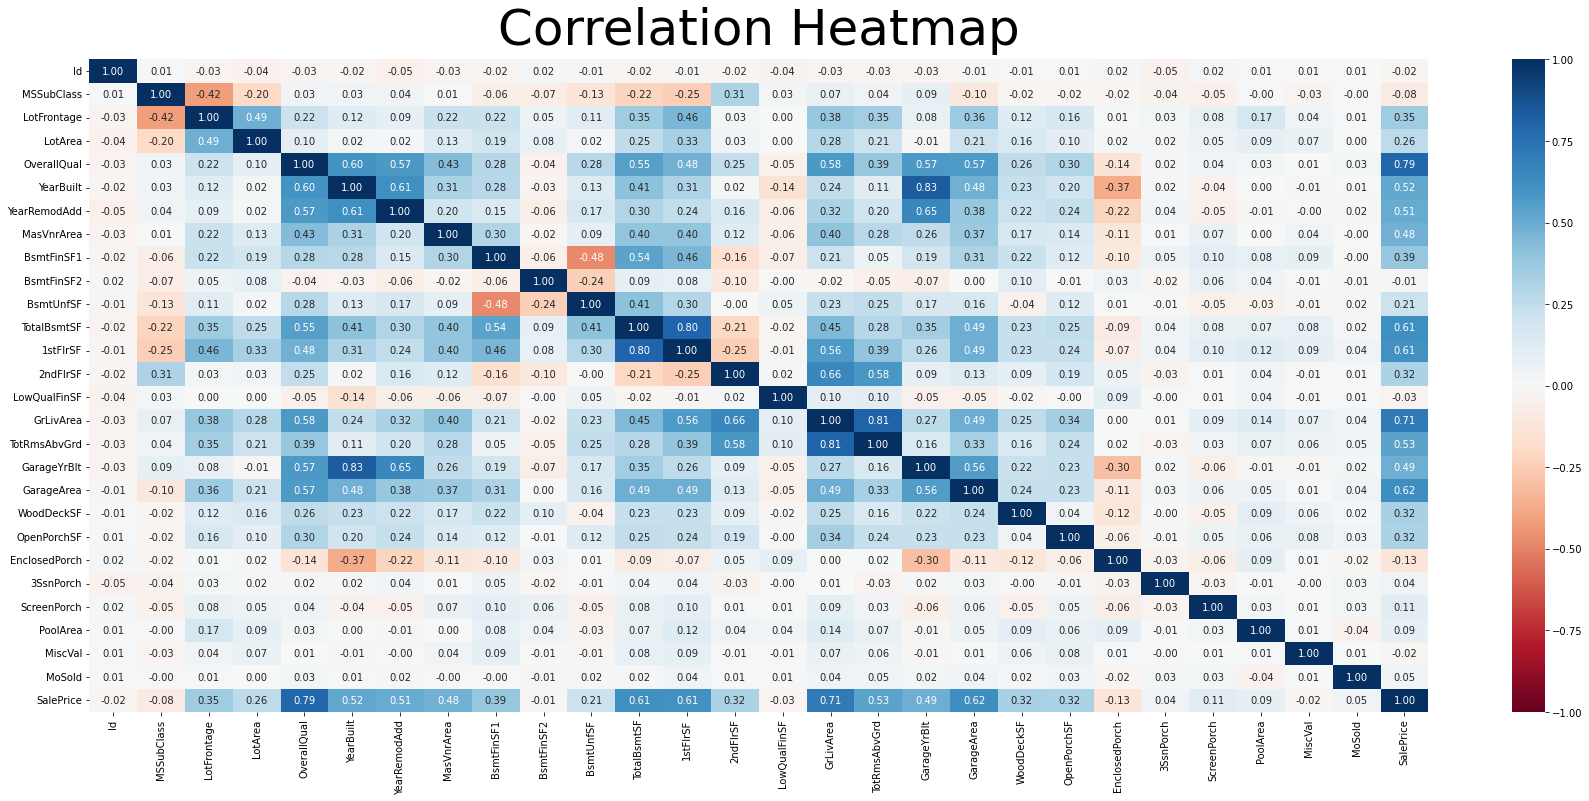

In [24]:
plt.figure(figsize=(30, 12))
heatmap = sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1,fmt=".2f", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':50}, pad=15);

In [25]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

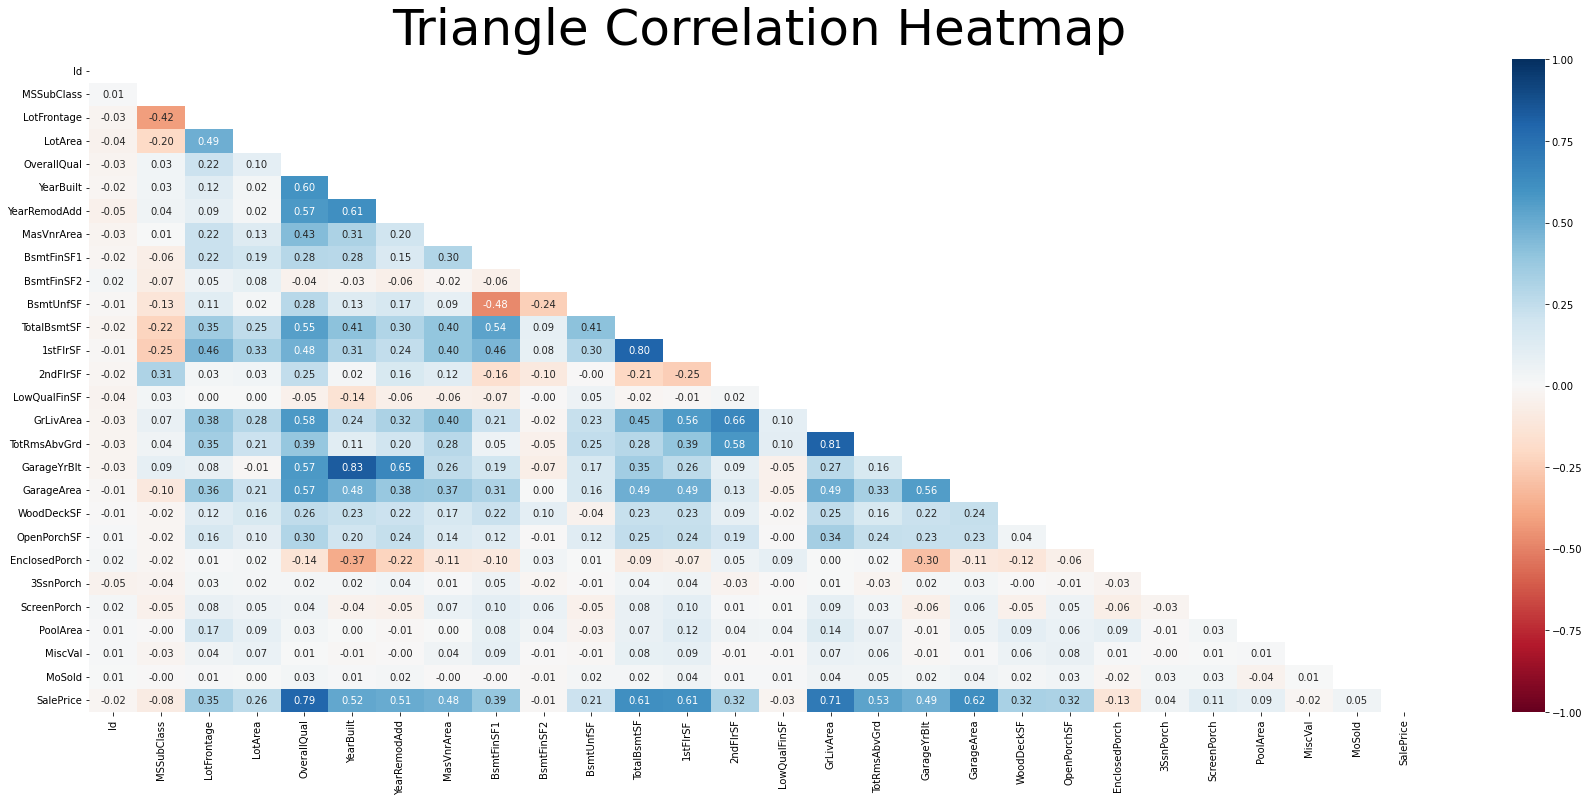

In [26]:
plt.figure(figsize=(30, 12))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True,fmt=".2f" ,cmap="RdBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':50}, pad=15)

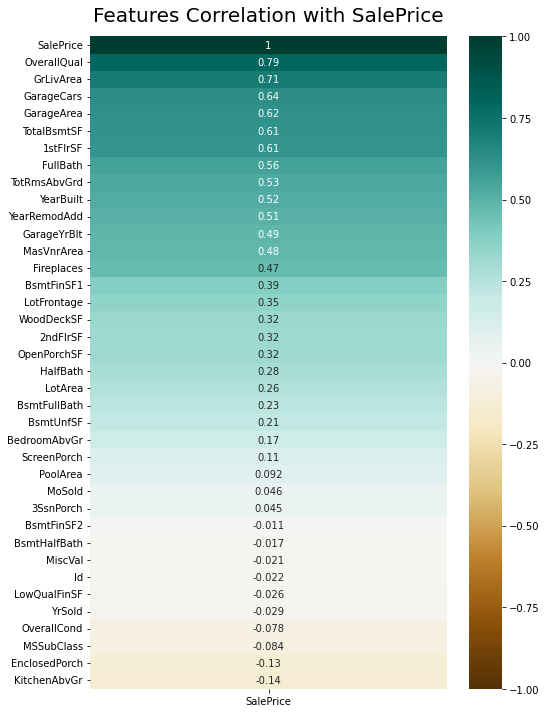

In [27]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1,
                              vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with '+'SalePrice', fontdict={'fontsize': 20}, pad=15);

Variables that have a high correlation with each other are detected. Among them, the one with less correlation with the independent variable is selected. It is then deleted.

In [28]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    """
    If the variables are correlated, the chosen variable will be the one with a higher correlation with the target.
    """

    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

In [29]:
drop_list = high_correlated_cols(df, plot=False, corr_th=0.80)

drop_list

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [30]:
df.drop(drop_list, axis=1, inplace=True)

# 5 - Outlier Analysis

In this section, outlier analysis will be done. The upper and lower limits will be determined with the outlier_thresholds() function. Then it will be observed whether there is an outlier using the check_outlier() function.

In [31]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [32]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 77
cat_cols: 52
num_cols: 24
cat_but_car: 1
num_but_cat: 10


In [34]:
for col in num_cols:
    if col != "SalePrice":
        print(col,"-", check_outlier(df, col))

Id - False
MSSubClass - True
LotFrontage - True
LotArea - True
OverallQual - True
YearBuilt - True
YearRemodAdd - False
MasVnrArea - True
BsmtFinSF1 - True
BsmtFinSF2 - True
BsmtUnfSF - True
TotalBsmtSF - True
2ndFlrSF - True
LowQualFinSF - True
GrLivArea - True
WoodDeckSF - True
OpenPorchSF - True
EnclosedPorch - True
3SsnPorch - True
ScreenPorch - True
PoolArea - True
MiscVal - True
MoSold - False


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


Outliers will be replaced by the specified up and low limits.

In [36]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [37]:
for col in num_cols:
    if col != "SalePrice":
        replace_with_thresholds(df, col)

In [38]:
for col in num_cols:
    if col != "SalePrice":
        print(col,"-", check_outlier(df, col))

Id - False
MSSubClass - False
LotFrontage - False
LotArea - False
OverallQual - False
YearBuilt - False
YearRemodAdd - False
MasVnrArea - False
BsmtFinSF1 - False
BsmtFinSF2 - False
BsmtUnfSF - False
TotalBsmtSF - False
2ndFlrSF - False
LowQualFinSF - False
GrLivArea - False
WoodDeckSF - False
OpenPorchSF - False
EnclosedPorch - False
3SsnPorch - False
ScreenPorch - False
PoolArea - False
MiscVal - False
MoSold - False


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.00,730.5,1460.0,2189.5,2919.00
MSSubClass,2919.0,55.334018,37.790000,20.00,20.0,50.0,70.0,145.00
LotFrontage,2433.0,68.630497,19.782361,27.50,59.0,68.0,80.0,111.50
LotArea,2919.0,9576.512847,3611.992836,1340.00,7478.0,9453.0,11570.0,17708.00
OverallQual,2919.0,6.090442,1.405478,2.00,5.0,6.0,7.0,10.00
OverallCond,2919.0,5.564577,1.113131,1.00,5.0,5.0,6.0,9.00
YearBuilt,2919.0,1971.323827,30.257831,1882.25,1953.5,1973.0,2001.0,2010.00
YearRemodAdd,2919.0,1984.264474,20.894344,1950.00,1965.0,1993.0,2004.0,2010.00
MasVnrArea,2896.0,88.611533,133.803493,0.00,0.0,0.0,164.0,410.00
BsmtFinSF1,2918.0,438.269877,437.972139,0.00,0.0,368.5,733.0,1832.50


# 6 - Missing Value Analysis

In this section, missing value analysis will be done. With the help of missing_values_table() function, a dataframe containing information about missing values ​​will be created. This dataframe contains information about how many missing values ​​are in each column and their ratio.

In [40]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [41]:
na_columns = missing_values_table(df) 

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageCond       159   5.45
GarageFinish     159   5.45
GarageQual       159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtHalfBath       2   0.07
Functional         2   0.07
BsmtFullBath       2   0.07
Utilities          2   0.07
KitchenQual        1   0.03
Electrical         1   0.03
BsmtUnfSF          1   0.03
GarageCars         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
Exterior2nd        1   0.03
Exterior1st        1   0.03
SaleType           1   0.03
TotalBsmtSF        1   0.03


Null values ​​in some variables indicate that the house does not have the relevant feature. These variables are detected and assigned to the list named no_cols. Then the null values ​​are replaced with "no".

In [42]:
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]  

In [43]:
for col in no_cols:
    df[col].fillna("No",inplace=True) 

In [44]:
na_columns = missing_values_table(df)

              n_miss  ratio
SalePrice       1459  49.98
LotFrontage      486  16.65
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
Utilities          2   0.07
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Functional         2   0.07
Exterior2nd        1   0.03
Exterior1st        1   0.03
BsmtFinSF1         1   0.03
BsmtFinSF2         1   0.03
TotalBsmtSF        1   0.03
Electrical         1   0.03
KitchenQual        1   0.03
GarageCars         1   0.03
SaleType           1   0.03
BsmtUnfSF          1   0.03


A function named fill_miss has been created to fill in the remaining empty values. With the help of this function, null values ​​in categorical variables are filled with their modes. Null values ​​in numeric variables are filled with their median.  
There is also the option to fill in the null values ​​in the numeric variables with mean.

In [45]:
def fill_miss(df, car_th=20, num_method = "median", target = "SalePrice"):
    
    temp_target = df[target]
    
    df = df.apply(lambda x : x.fillna(x.mode()[0] if (x.dtype == "O" and len(x.unique()) <= car_th) else x, axis=0))
    
    if num_method == "mean":
        df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    
    elif num_method == "median":
        df = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

    df[target] = temp_target
    
    return df

In [46]:
df = fill_miss(df, car_th=17)

In [47]:
missing_values_table(df) 

           n_miss  ratio
SalePrice    1459  49.98


# 7 - Encoding

# 7.1 - Rare Encoding

A large number of classes can increase the number of iterations and also increase the optimization time. At this point, Rare encoding identifies the classes whose frequency is lower than the specified threshold value and treats them as a single class. 

First, the rare_analyser function was created to observe rare classes.Then rare encoding process was performed.

In [48]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [49]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 5
         COUNT     RATIO    TARGET_MEAN
C (all)     25  0.008565   74528.000000
FV         139  0.047619  214014.061538
RH          26  0.008907  131558.375000
RL        2269  0.777321  191004.994787
RM         460  0.157588  126316.830275


Street : 2
      COUNT     RATIO    TARGET_MEAN
Grvl     12  0.004111  130190.500000
Pave   2907  0.995889  181130.538514


Alley : 3
      COUNT     RATIO    TARGET_MEAN
Grvl    120  0.041110  122219.080000
No     2721  0.932169  183452.131483
Pave     78  0.026721  168000.585366


LotShape : 4
     COUNT     RATIO    TARGET_MEAN
IR1    968  0.331620  206101.665289
IR2     76  0.026036  239833.365854
IR3     16  0.005481  216036.500000
Reg   1859  0.636862  164754.818378


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    117  0.040082  143104.079365
HLS    120  0.041110  231533.940000
Low     60  0.020555  203661.111111
Lvl   2622  0.898253  180183.746758


Utilities : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   2918  0

In [50]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [51]:
df = rare_encoder(df,0.01)

In [52]:
rare_analyser(df, "SalePrice", cat_cols)

MSZoning : 4
      COUNT     RATIO    TARGET_MEAN
FV      139  0.047619  214014.061538
RL     2269  0.777321  191004.994787
RM      460  0.157588  126316.830275
Rare     51  0.017472  109623.615385


Street : 2
      COUNT     RATIO    TARGET_MEAN
Pave   2907  0.995889  181130.538514
Rare     12  0.004111  130190.500000


Alley : 3
      COUNT     RATIO    TARGET_MEAN
Grvl    120  0.041110  122219.080000
No     2721  0.932169  183452.131483
Pave     78  0.026721  168000.585366


LotShape : 4
      COUNT     RATIO    TARGET_MEAN
IR1     968  0.331620  206101.665289
IR2      76  0.026036  239833.365854
Rare     16  0.005481  216036.500000
Reg    1859  0.636862  164754.818378


LandContour : 4
     COUNT     RATIO    TARGET_MEAN
Bnk    117  0.040082  143104.079365
HLS    120  0.041110  231533.940000
Low     60  0.020555  203661.111111
Lvl   2622  0.898253  180183.746758


Utilities : 2
        COUNT     RATIO   TARGET_MEAN
AllPub   2918  0.999657  180950.95682
Rare        1  0.000343  137

# 7.2 - Label Encoding

Firstly, some variables will be dropped. 

When the classes of variables are examined, in some of them, one class is more dominant than the other classes of the same variable. This will not make a significant difference in model training.  

Variables with the above-mentioned condition have been identified and added to the drop_list. Apart from that, the "categorical looking but carry no information" Neighborhood variable  has also been added to the list.

In [53]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]

In [54]:
for col in drop_list:
    cat_summary(df, col)

      Street    Ratio    Cumsum
Pave    2907  99.5889   99.5889
Rare      12   0.4111  100.0000
####################################################################
      Alley      Ratio      Cumsum
No     2721  93.216855   93.216855
Grvl    120   4.110997   97.327852
Pave     78   2.672148  100.000000
####################################################################
     LandContour      Ratio      Cumsum
Lvl         2622  89.825283   89.825283
HLS          120   4.110997   93.936280
Bnk          117   4.008222   97.944502
Low           60   2.055498  100.000000
####################################################################
        Utilities      Ratio      Cumsum
AllPub       2918  99.965742   99.965742
Rare            1   0.034258  100.000000
####################################################################
      LandSlope      Ratio      Cumsum
Gtl        2778  95.169579   95.169579
Mod         125   4.282288   99.451867
Rare         16   0.548133  100.000000
#########

In [55]:
df.drop(drop_list, axis=1, inplace=True)

In [56]:
cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 2919
Variables: 68
cat_cols: 52
num_cols: 16
cat_but_car: 0
num_but_cat: 18


In this section, label encoding will be done. Firstly, binary columns were determined to be used in the label encoder. Columns with object type and 2 unique values ​​are selected. Finally, the selected columns are given to the label encoder.

In [57]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [58]:
binary_cols

['Condition2', 'RoofMatl', 'CentralAir']

In [59]:
df[binary_cols].head()

,Condition2,RoofMatl,CentralAir
0,Norm,CompShg,Y
1,Norm,CompShg,Y
2,Norm,CompShg,Y
3,Norm,CompShg,Y
4,Norm,CompShg,Y


In [60]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [61]:
for col in binary_cols:
    label_encoder(df, col)

In [62]:
df[binary_cols].head()

,Condition2,RoofMatl,CentralAir
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# 7.3 - One-Hot Encoding

In this part of the encoding process, first the columns to be given to the one-hot encoder will be determined, and then they will be given to the one-hot encoder.
The determination of the relevant columns was made by selecting those whose unique value number is greater than 2 and less than or equal to 15. Then these columns are given to the one-hot encoder.

In [63]:
ohe_cols = [col for col in df.columns if 15 >= df[col].nunique() > 2]

In [64]:
ohe_cols

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [65]:
df[ohe_cols].head()

,MSSubClass,MSZoning,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Reg,Inside,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,SBrkr,1.0,0.0,2,1,3,1,Gd,Typ,0,No,Attchd,RFn,2.0,TA,TA,Y,No,2,2008,WD,Normal
1,20,RL,Reg,FR2,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,SBrkr,0.0,1.0,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,No,5,2007,WD,Normal
2,60,RL,IR1,Inside,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,SBrkr,1.0,0.0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,No,9,2008,WD,Normal
3,70,RL,IR1,Corner,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,SBrkr,1.0,0.0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3.0,TA,TA,Y,No,2,2006,WD,Abnorml
4,60,RL,IR1,FR2,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,1.0,0.0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3.0,TA,TA,Y,No,12,2008,WD,Normal


In [66]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [67]:
df = one_hot_encoder(df, ohe_cols)

In [68]:
df.head()

,Id,LotFrontage,LotArea,Condition2,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_145,MSZoning_RL,MSZoning_RM,MSZoning_Rare,LotShape_IR2,LotShape_Rare,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Rare,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Rare,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,Electrical_FuseF,Electrical_Rare,Electrical_SBrkr,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtFullBath_3.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_No,GarageType_Rare,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1.0,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,GarageQual_No,GarageQual_Rare,GarageQual_TA,GarageCond_No,GarageCond_Rare,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_No,Fence_Rare,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,1,65.0,8450,0,2003.0,2003.0,0,196.0,706.0,0.0,150.0,856.0,1,854,0,1710.0,0,61,0,0,0,0,0,208500.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,2,80.0,9600,0,1976.0,1976.0,0,0.0,978.0,0.0,284.0,1262.0,1,0,0,1262.0,298,0,0,0,0,0,0,181500.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,

# 8 - Scaling

In order to ensure that the model to be used approaches the variables under equal conditions, scaling is performed.  
RobustScaler is used. RobustScaler is not affected by outlier values. It is obtained by subtracting the median from all values ​​and then dividing by the iqr value.

In [69]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2919
Variables: 225
cat_cols: 211
num_cols: 14
cat_but_car: 0
num_but_cat: 211


In [70]:
num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [71]:
num_cols.remove("Id")

num_cols.remove("SalePrice")

In [72]:
num_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [73]:
df[num_cols].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,2003.0,2003.0,196.0,706.0,150.0,856.0,854,1710.0,0,61
1,80.0,9600,1976.0,1976.0,0.0,978.0,284.0,1262.0,0,1262.0,298,0
2,68.0,11250,2001.0,2002.0,162.0,486.0,434.0,920.0,866,1786.0,0,42
3,60.0,9550,1915.0,1970.0,0.0,216.0,540.0,756.0,756,1717.0,0,35
4,84.0,14260,2000.0,2000.0,350.0,655.0,490.0,1145.0,1053,2198.0,192,84


In [74]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.0,68.525522,18.061508,27.50,60.0,68.0,78.0,111.50
LotArea,2919.0,9576.512847,3611.992836,1340.00,7478.0,9453.0,11570.0,17708.00
YearBuilt,2919.0,1971.323827,30.257831,1882.25,1953.5,1973.0,2001.0,2010.00
YearRemodAdd,2919.0,1984.264474,20.894344,1950.00,1965.0,1993.0,2004.0,2010.00
MasVnrArea,2919.0,87.913326,133.505285,0.00,0.0,0.0,163.5,410.00
BsmtFinSF1,2919.0,438.245975,437.898990,0.00,0.0,368.5,733.0,1832.50
BsmtUnfSF,2919.0,557.933796,431.284997,0.00,220.0,467.0,805.0,1683.75
TotalBsmtSF,2919.0,1045.411271,407.895403,29.50,793.0,989.5,1302.0,2065.50
2ndFlrSF,2919.0,336.231929,427.813102,0.00,0.0,0.0,704.0,1760.00
GrLivArea,2919.0,1490.527407,468.900689,334.00,1126.0,1444.0,1743.5,2669.75


In [75]:
rs = RobustScaler()

df[num_cols] = rs.fit_transform(df[num_cols])

In [76]:
df[num_cols]

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF
0,-0.166667,-0.245112,0.631579,0.256410,1.198777,0.460437,-0.541880,-0.262279,1.213068,0.430769,0.000000,0.500000
1,0.666667,0.035924,0.063158,-0.435897,0.000000,0.831514,-0.312821,0.535363,0.000000,-0.294737,1.773810,-0.371429
2,0.000000,0.439150,0.589474,0.230769,0.990826,0.160300,-0.056410,-0.136542,1.230114,0.553846,0.000000,0.228571
3,-0.444444,0.023705,-1.221053,-0.589744,0.000000,-0.208049,0.124786,-0.458743,1.073864,0.442105,0.000000,0.128571
4,0.888889,1.174731,0.568421,0.179487,2.140673,0.390859,0.039316,0.305501,1.495739,1.221053,1.142857,0.828571
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-2.250000,-1.836999,-0.063158,-0.589744,0.000000,-0.502729,0.135043,-0.871316,0.775568,-0.570040,0.000000,-0.371429
2915,-2.250000,-1.847263,-0.063158,-0.589744,0.000000,-0.158936,-0.295726,-0.871316,0.775568,-0.570040,0.000000,-0.028571
2916,2.416667,2.017351,-0.273684,0.076923,0.000000,1.167121,-0.798291,0.460707,0.000000,-0.356275,2.500000,-0.371429
2917,-0.333333,0.241447,0.400000,-0.025641,0.000000,-0.042974,0.184615,-0.152259,0.000000,-0.767611,0.476190,0.085714


In [77]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.0,0.029196,1.003417,-2.250000,-0.444444,0.0,0.555556,2.416667
LotArea,2919.0,0.030184,0.882696,-1.982649,-0.482649,0.0,0.517351,2.017351
YearBuilt,2919.0,-0.035288,0.637007,-1.910526,-0.410526,0.0,0.589474,0.778947
YearRemodAdd,2919.0,-0.223988,0.535752,-1.102564,-0.717949,0.0,0.282051,0.435897
MasVnrArea,2919.0,0.537696,0.816546,0.000000,0.000000,0.0,1.000000,2.507645
BsmtFinSF1,2919.0,0.095151,0.597407,-0.502729,-0.502729,0.0,0.497271,1.997271
BsmtUnfSF,2919.0,0.155442,0.737239,-0.798291,-0.422222,0.0,0.577778,2.079915
TotalBsmtSF,2919.0,0.109845,0.801366,-1.886051,-0.386051,0.0,0.613949,2.113949
2ndFlrSF,2919.0,0.477602,0.607689,0.000000,0.000000,0.0,1.000000,2.500000
GrLivArea,2919.0,0.075348,0.759353,-1.797571,-0.514980,0.0,0.485020,1.985020


# 9 - Modeling

LightGBM model was used in this section. It is a model developed by Microsoft in 2017 to increase the training time performance of XGBoost. It is a type of GBM.

# 9.1 - Train-Test Split

In [78]:
train_df = df[df['SalePrice'].notnull()]
test_df = df[df['SalePrice'].isnull()]

In [79]:
y = train_df['SalePrice']
X = train_df.drop(["Id", "SalePrice"], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=55)

# 9.2 - Modeling Before Optimization

In this section, a model training was performed before hyper parameter optimization. Then the RMSE (Root Mean Square Error) value was calculated. In the last part, the mean and standard deviation of the dependent variable were calculated. 

If the RMSE value is close to the mean of the dependent variable, we can say that the model predicts values ​​close to the mean of the actual values.  

If the RMSE value is close to the standard deviation, we can say that it predicts similar values ​​in terms of spread to actual values.

In [81]:
lgbm_model = LGBMRegressor(random_state=55)

In [82]:
lgbm_model.fit(X_train,y_train)

LGBMRegressor(random_state=55)

In [83]:
y_pred = lgbm_model.predict(X_test)

In [84]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [85]:
print("SalePrice RMSE :",rmse)
  
print("SalePrice Mean :",df['SalePrice'].mean())
  
print("SalePrice Standard Deviation :",df['SalePrice'].std())

SalePrice RMSE : 34363.31703229769
SalePrice Mean : 180921.19589041095
SalePrice Standard Deviation : 79442.50288288662


# 9.3 - Hyperparameter Optimization

In [86]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 55,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [87]:
lgbm_params = {"learning_rate": [0.01, 0.05, 0.1],
               "n_estimators": [500, 1000, 1500],
               "colsample_bytree": [0.5, 0.9, 1]
             }

In [88]:
lgbm_gs_best = GridSearchCV(lgbm_model,
                            lgbm_params,
                            cv=3,
                            n_jobs=-1,
                            verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [89]:
lgbm_gs_best.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 1500}

# 9.4 - Final Model

In [90]:
lgbm_final = LGBMRegressor(**lgbm_gs_best.best_params_).fit(X_train, y_train)

In [91]:
y_pred = lgbm_final.predict(X_test)

In [92]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

32599.50498736521

# 10 - Feature Importance

In [93]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

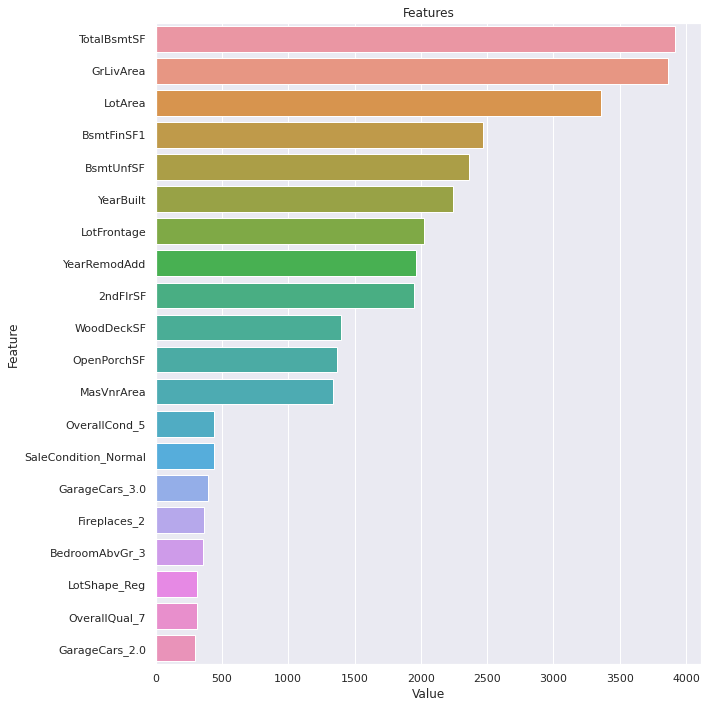

In [94]:
plot_importance(lgbm_final, X_train,20)